In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scikitplot.metrics import plot_confusion_matrix

In [ ]:
from pylab import rcParams

**Importing Dataset**

In [ ]:
df = pd.read_csv('/content/Youtube02-KatyPerry.csv')

<Axes: xlabel='CLASS', ylabel='count'>

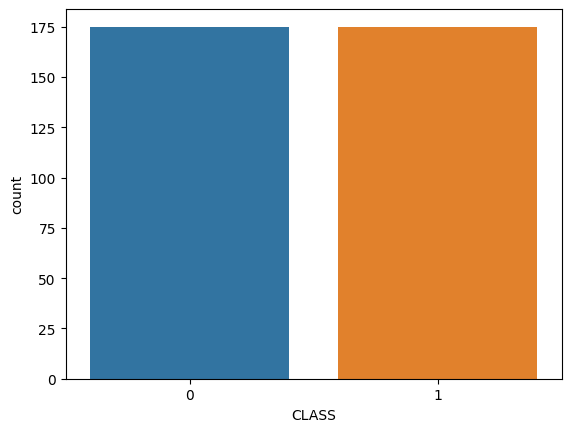

In [ ]:
sns.countplot(x='CLASS',data=df)

**Data Pre-Processing**

In [ ]:
lm = WordNetLemmatizer()

def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [ ]:
corpus = text_transformation(df['CONTENT'])

**Data Visualisation**

In [ ]:
rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)


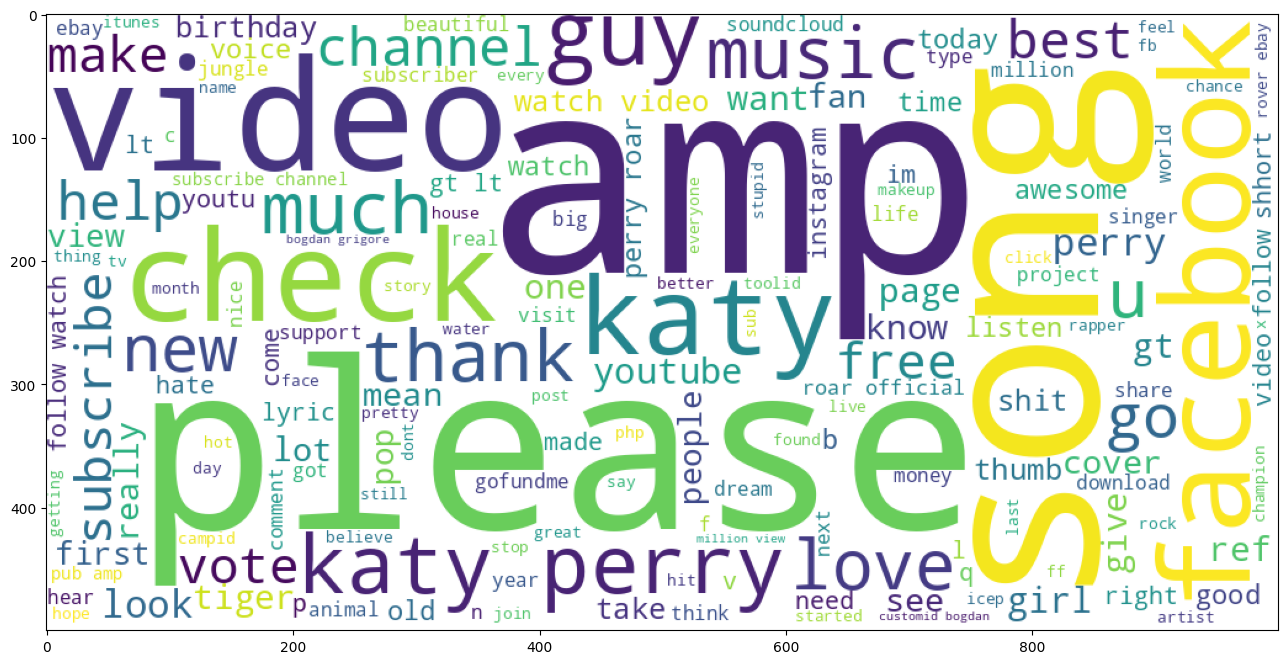

In [ ]:
plt.imshow(wordcloud)

In [ ]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.CLASS

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(X,y)

LogisticRegression()

In [ ]:
test_df = pd.read_csv('/content/Youtube02-KatyPerry.csv')

In [ ]:
X_test,y_test = test_df.CONTENT,test_df.CLASS

In [ ]:
test_corpus = text_transformation(X_test)

In [ ]:
testdata = cv.transform(test_corpus)

In [ ]:
predictions = lr.predict(testdata)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

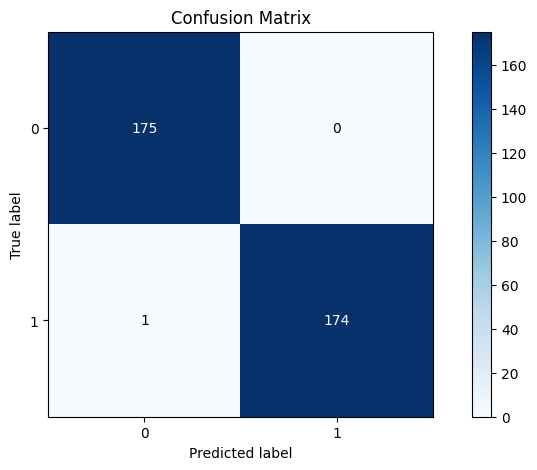

In [ ]:
rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)

In [ ]:
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

Accuracy_score:  0.9971428571428571
Precision_score:  1.0
Recall_score:  0.9942857142857143
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       175
           1       1.00      0.99      1.00       175

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350

